In [0]:
from scipy.io import wavfile
import numpy as np

In [0]:
sample_rate_A, signal_A = wavfile.read('./mixedA.wav')
sample_rate_B, signal_B = wavfile.read('./mixedB.wav')

In [0]:
data_mixed = np.vstack((signal_A, signal_B)).T
# or you can also use np.c_[datA, dataB]

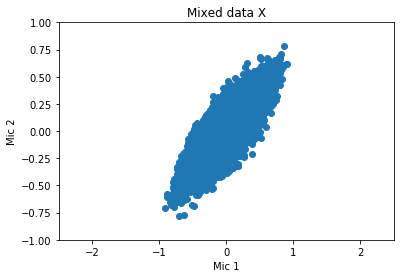

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data_mixed[:,0], data_mixed[:,1])
plt.xlim(-2.5, 2.5)
plt.ylim(-1, 1)
plt.title('Mixed data X')
plt.xlabel('Mic 1')
plt.ylabel('Mic 2')
plt.show()

In [0]:
data_centr  = data_mixed - [np.mean(data_mixed[:,0]), np.mean(data_mixed[:,1])]

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)

In [0]:
data_whitened = pca.fit_transform(data_centr)

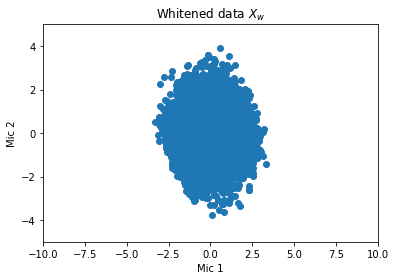

In [8]:
plt.scatter(data_whitened[:,0], data_whitened[:,1])
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.title('Whitened data $X_w$')
plt.xlabel('Mic 1')
plt.ylabel('Mic 2')
plt.show()

In [0]:
def gentropy(values):
    hist = np.histogram(values, bins=500)
    data = hist[0]
    data = data[data != 0]
    data = data / data.sum()
    ent = -(data*np.log2(np.abs(data))).sum()
    return ent

In [0]:
def rotate(x, values):
    rot = [[np.cos(x), - np.sin(x)], [np.sin(x), np.cos(x)]]
    return np.dot(values, rot)

In [0]:
thetas = np.linspace(0, np.pi, 180)

In [0]:
mi_values = []
for x in thetas:
    rot_data = rotate(x, data_whitened)
    entr = 0
    for i in range(2):
        entr += gentropy(rot_data[:,i])
    mi_values.append(entr)

theta_min = thetas[mi_values.index(np.min(mi_values))]

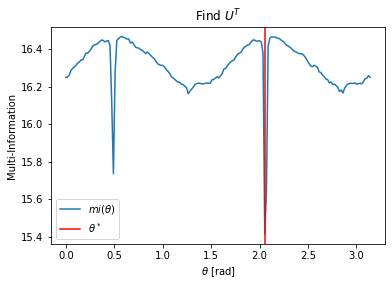

In [13]:
#plt.figure(num=None, figsize=(5, 2))
plt.plot(thetas, mi_values)
plt.axvline(x=theta_min, color='r')
plt.title('Find $U^T$')
plt.xlabel('$\\theta$ [rad]')
plt.ylabel('Multi-Information')
plt.legend(labels=['$mi(\\theta)$', '$\\theta^*$'])
plt.show()

In [0]:
data_reconstructed = rotate(theta_min, data_whitened)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
data_reconstructed = scaler.fit_transform(data_reconstructed)

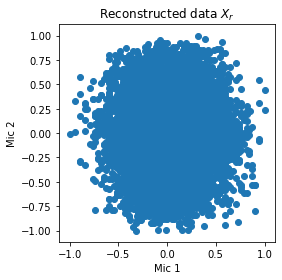

In [16]:
#plt.figure(num=None, figsize=(5, 2))
ax = plt.scatter(data_reconstructed[:,0], data_reconstructed[:,1]).axes
ax.set_aspect('equal')
#plt.xlim(-3, 3)
plt.title('Reconstructed data $X_r$')
plt.xlabel('Mic 1')
plt.ylabel('Mic 2')
plt.show()

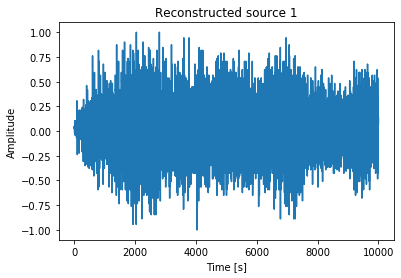

In [17]:
plt.plot(data_reconstructed[:,0])
plt.title('Reconstructed source 1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

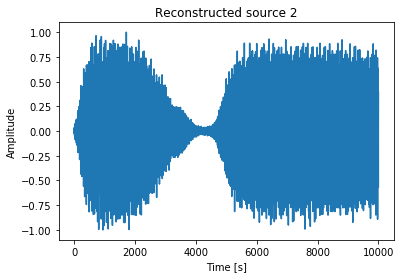

In [18]:
plt.plot(data_reconstructed[:,1])
plt.title('Reconstructed source 2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()